# Step 2 - Classification of text data using fully connected neural networks

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Get the Data

In [2]:
# https://www.kaggle.com/adarshsng/predicting-job-type-category-by-job-description
def str_to_lst(x):
    return x.replace("'", "").replace("[", "").replace("]", "").split(", ")

In [3]:
df = pd.read_csv("preprocessed_train.csv")
df['job_description'] = df['job_description'].apply(lambda x: str_to_lst(x))
df.head()

,job_no,job_description,job_type,category
0,Id-12765,"[zest, scientif, search, accomplish, scientif,...",Permanent,"Pharmaceutical, Healthcare and Medical Sales"
1,Id-1321,"[asha, mistri, umbil, life, recruit, experienc...",Contract/Interim,Pharmaceutical Marketing
2,Id-9473,"[sale, repres, laser, der, medizintechnik, mun...",Permanent,"Pharmaceutical, Healthcare and Medical Sales"
3,Id-14952,"[field, servic, engin, life, scienc, cambridg,...",Permanent,Manufacturing & Operations
4,Id-16692,"[due, increas, busi, demand, award, win, world...",Permanent,"Pharmaceutical, Healthcare and Medical Sales"


### Job Type

In [4]:
Job_type = {
    'Permanent':0,
    'Contract/Interim':1,
    'Contract/Temp':2,
    'Temporary/Seasonal':3,
    'Any':4,
    'Part-Time':5
    }

def set_label(x):
    return Job_type[x]

df['labels'] = df['job_type'].apply(lambda x: set_label(x))
df.head()

,job_no,job_description,job_type,category,labels
0,Id-12765,"[zest, scientif, search, accomplish, scientif,...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
1,Id-1321,"[asha, mistri, umbil, life, recruit, experienc...",Contract/Interim,Pharmaceutical Marketing,1
2,Id-9473,"[sale, repres, laser, der, medizintechnik, mun...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
3,Id-14952,"[field, servic, engin, life, scienc, cambridg,...",Permanent,Manufacturing & Operations,0
4,Id-16692,"[due, increas, busi, demand, award, win, world...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(df['job_description'], 
                                                    df['labels'], 
                                                    test_size=0.10, 
                                                    random_state=42)

### Vectorization

In [6]:
tokens = []

for lst in df["job_description"]:
    tokens += lst
    
dictionary = list(set(tokens))

def tokens_to_num(lst):
    res = [dictionary.index(i) for i in lst]
    return res

In [7]:
X_train = X_train.apply(tokens_to_num)
X_test = X_test.apply(tokens_to_num)

In [8]:
def vectorize_sequences(sequences, dimension = 15000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [10]:
x_train = vectorize_sequences(X_train)
x_test = vectorize_sequences(X_test)
y_train = np.asarray(Y_train).astype("float32")
y_test = np.asarray(Y_test).astype("float32")

### Train a fully connected neural network

In [11]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 1)

Epoch 1/10
70/70 - 1s - loss: 0.1476 - accuracy: 0.9146 - val_loss: 0.1365 - val_accuracy: 0.9429 - 1s/epoch - 18ms/step
Epoch 2/10
70/70 - 1s - loss: 0.0926 - accuracy: 0.9587 - val_loss: 0.1170 - val_accuracy: 0.9618 - 618ms/epoch - 9ms/step
Epoch 3/10
70/70 - 1s - loss: 0.0824 - accuracy: 0.9657 - val_loss: 0.1140 - val_accuracy: 0.9627 - 618ms/epoch - 9ms/step
Epoch 4/10
70/70 - 1s - loss: 0.0795 - accuracy: 0.9674 - val_loss: 0.1101 - val_accuracy: 0.9681 - 626ms/epoch - 9ms/step
Epoch 5/10
70/70 - 1s - loss: 0.0775 - accuracy: 0.9691 - val_loss: 0.1095 - val_accuracy: 0.9685 - 598ms/epoch - 9ms/step
Epoch 6/10
70/70 - 1s - loss: 0.0770 - accuracy: 0.9691 - val_loss: 0.1103 - val_accuracy: 0.9667 - 608ms/epoch - 9ms/step
Epoch 7/10
70/70 - 1s - loss: 0.0768 - accuracy: 0.9699 - val_loss: 0.1106 - val_accuracy: 0.9658 - 603ms/epoch - 9ms/step
Epoch 8/10
70/70 - 1s - loss: 0.0764 - accuracy: 0.9694 - val_loss: 0.1111 - val_accuracy: 0.9654 - 611ms/epoch - 9ms/step
Epoch 9/10
70/70 -

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 480,065
Trainable params: 480,065
Non-trainable params: 0
_________________________________________________________________


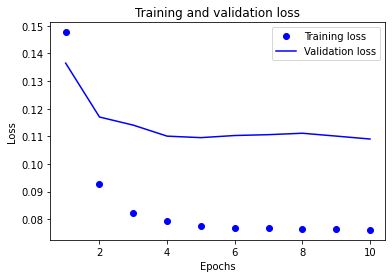

In [13]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.10640706866979599
Test accuracy: 0.9635922312736511


### Category

In [15]:
Category = {
    'Pharmaceutical, Healthcare and Medical Sales':0,
    'Clinical Research':1,
    'Pharmaceutical Marketing':2,
    'Manufacturing & Operations':3,
    'Science':4,
    'Medical Affairs / Pharmaceutical Physician':5,
    'Regulatory Affairs':6,
    'Medical Information and Pharmacovigilance':7,
    'Data Management and Statistics':8,
    'Quality-assurance':9,
    'Pharmacy':10
    }

def set_label(x):
    return Category[x]

df['labels'] = df['category'].apply(lambda x: set_label(x))
df.head()

,job_no,job_description,job_type,category,labels
0,Id-12765,"[zest, scientif, search, accomplish, scientif,...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
1,Id-1321,"[asha, mistri, umbil, life, recruit, experienc...",Contract/Interim,Pharmaceutical Marketing,2
2,Id-9473,"[sale, repres, laser, der, medizintechnik, mun...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0
3,Id-14952,"[field, servic, engin, life, scienc, cambridg,...",Permanent,Manufacturing & Operations,3
4,Id-16692,"[due, increas, busi, demand, award, win, world...",Permanent,"Pharmaceutical, Healthcare and Medical Sales",0


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(df['job_description'], 
                                                    df['labels'], 
                                                    test_size=0.30, 
                                                    random_state=42)

In [17]:
X_train = X_train.apply(tokens_to_num)
X_test = X_test.apply(tokens_to_num)

In [18]:
x_train = vectorize_sequences(X_train)
x_test = vectorize_sequences(X_test)
y_train = np.asarray(Y_train).astype("float32")
y_test = np.asarray(Y_test).astype("float32")

In [19]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    shuffle = True,
                    verbose = 2)

Epoch 1/10
55/55 - 1s - loss: 10.4125 - accuracy: 0.1797 - val_loss: 10.0659 - val_accuracy: 0.1827 - 1s/epoch - 19ms/step
Epoch 2/10
55/55 - 0s - loss: 10.2804 - accuracy: 0.2070 - val_loss: 9.9765 - val_accuracy: 0.3185 - 481ms/epoch - 9ms/step
Epoch 3/10
55/55 - 0s - loss: 10.2030 - accuracy: 0.2993 - val_loss: 9.9506 - val_accuracy: 0.3092 - 478ms/epoch - 9ms/step
Epoch 4/10
55/55 - 0s - loss: 10.1845 - accuracy: 0.3115 - val_loss: 9.9463 - val_accuracy: 0.3301 - 488ms/epoch - 9ms/step
Epoch 5/10
55/55 - 0s - loss: 10.1701 - accuracy: 0.3279 - val_loss: 9.9395 - val_accuracy: 0.3434 - 482ms/epoch - 9ms/step
Epoch 6/10
55/55 - 0s - loss: 10.1596 - accuracy: 0.3382 - val_loss: 9.9384 - val_accuracy: 0.3312 - 482ms/epoch - 9ms/step
Epoch 7/10
55/55 - 0s - loss: 10.1533 - accuracy: 0.3418 - val_loss: 9.9388 - val_accuracy: 0.3503 - 486ms/epoch - 9ms/step
Epoch 8/10
55/55 - 0s - loss: 10.1473 - accuracy: 0.3493 - val_loss: 9.9308 - val_accuracy: 0.3503 - 482ms/epoch - 9ms/step
Epoch 9/1

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                480032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 480,065
Trainable params: 480,065
Non-trainable params: 0
_________________________________________________________________


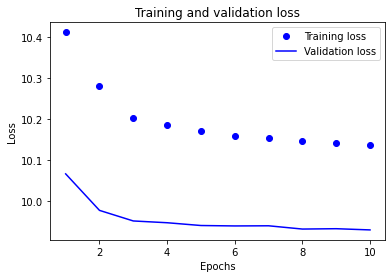

In [21]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 10.656654357910156
Test accuracy: 0.3471810221672058
